
## Import all essential libraries required for data preprocessing, modeling, and interpretability in this experiment


In [462]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

## Load and Prepare Data

In [463]:
df = pd.read_csv("breast_cancer.csv")

In [464]:
print(df.head())

   Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately di

In [465]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Drop unnamed or redundant columns

In [466]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [467]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


## Convert 'Survival Months' to numeric

In [468]:
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

## Drop rows where 'Survival Months' is missing

In [469]:
df = df.dropna(subset=['Survival Months'])

## Create binary target: survived >= 60 months

In [470]:
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

## Drop target-leaking or unnecessary columns

In [471]:
df = df.drop(columns=['Survival Months'])

In [472]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status,Survival_5yr
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,Alive,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,Alive,0
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,Dead,0
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,Dead,0
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,Dead,0


## Split Features and Target

In [473]:
X = df.drop(columns='Survival_5yr')
y = df['Survival_5yr']

In [474]:
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,Alive


In [475]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Survival_5yr, Length: 4024, dtype: int32

## Train-Test Split

In [476]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Handle Missing Values and Impute missing categorical features with 'Missing'

In [477]:
 X_train = X_train.fillna('Missing')
X_test = X_test.fillna('Missing')

## One-Hot Encoding After Split

In [478]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

## Align columns

In [479]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

## Scale Numerical Features

In [480]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

In [481]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Evaluated the Logistic Regression model using a classification report, confusion matrix, and ROC curve to assess accuracy, class balance, and overall performance

 Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



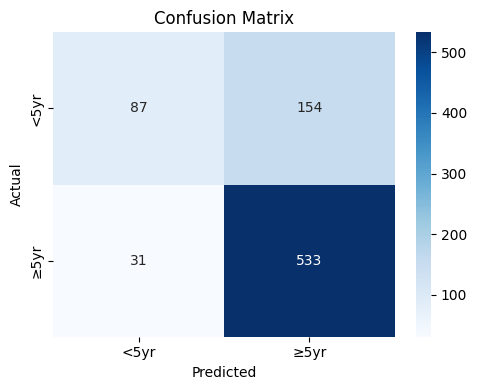

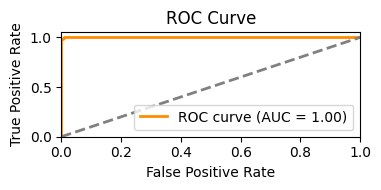

In [495]:
y_pred = clf.predict(X_test_scaled)

print(" Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<5yr', '≥5yr'], yticklabels=['<5yr', '≥5yr'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4,2))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Encode features

In [483]:
X_encoded = preprocessor.fit_transform(X)

## Get feature names after encoding

In [484]:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = list(ohe_feature_names) + numeric_cols

## Evaluated Logistic Regression using selected top features by training, testing, and reporting accuracy, F1-score, ROC-AUC, and generating a ROC curve plot.

In [490]:
def evaluate_model(X_data, selected_feature_indices, feature_names):
    X_sel = X_data[:, selected_feature_indices]
    
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)
     
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"Selected Features ({len(selected_feature_indices)}): {[feature_names[i] for i in selected_feature_indices]}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(4,2))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Select top 10 features

In [491]:
selector_10 = SelectKBest(score_func=f_classif, k=10)
selector_10.fit(X_encoded, y)
top10_indices = selector_10.get_support(indices=True)

## Evaluate on top 10 features

Selected Features (10): ['N Stage_N1', 'N Stage_N3', '6th Stage_IIA', '6th Stage_IIIC', 'Estrogen Status_Negative', 'Estrogen Status_Positive', 'Progesterone Status_Positive', 'Status_Alive', 'Status_Dead', 'Reginol Node Positive']
Accuracy: 0.770
F1-score: 0.852
ROC-AUC: 0.625

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



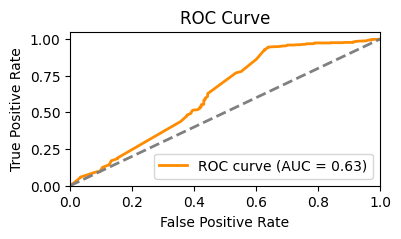

In [492]:
evaluate_model(X_encoded, top10_indices, all_feature_names)

## Select top 5 features

In [493]:
selector_5 = SelectKBest(score_func=f_classif, k=5)
selector_5.fit(X_encoded, y)
top5_indices = selector_5.get_support(indices=True)

## Evaluate on top 5 features

Selected Features (5): ['N Stage_N3', '6th Stage_IIIC', 'Status_Alive', 'Status_Dead', 'Reginol Node Positive']
Accuracy: 0.770
F1-score: 0.852
ROC-AUC: 0.650

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



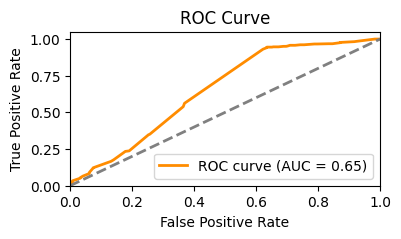

In [494]:
evaluate_model(X_encoded, top5_indices, all_feature_names)